In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist.keys()

['data', 'COL_NAMES', 'DESCR', 'target']

In [4]:
X, Y = mnist.data / 255.0, mnist.target
n = 60000
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=1)

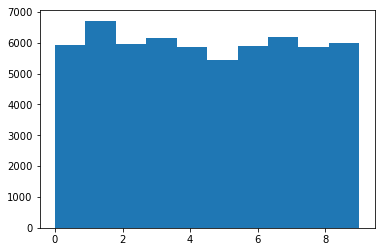

In [5]:
plt.hist(y_train)
plt.show()

In [6]:
#svm poly
from sklearn import svm
degree = 2
svm_classifier = svm.SVC(degree=2, kernel='poly')
svm_classifier.fit(x_train, y_train)
svm_expected = y_test
svm_predicted = svm_classifier.predict(x_test)
print("Accuracy={}".format(metrics.accuracy_score(svm_expected, svm_predicted)))

Accuracy=0.9797


In [7]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
knn_expected = y_test
knn_predicted = knn_classifier.predict(x_test)
print "Accuracy={}".format(metrics.accuracy_score(knn_expected, knn_predicted))

Accuracy=0.9733


In [8]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_classifier.fit(x_train, y_train)
rf_expected = y_test
rf_predicted = rf_classifier.predict(x_test)
print "Accuracy={}".format(metrics.accuracy_score(rf_expected, rf_predicted))

Accuracy=0.968


In [9]:
#ensemble
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[('knn', knn_classifier), ('rf', rf_classifier), ('svm', svm_classifier)], voting='hard')
ensemble_classifier.fit(x_train, y_train)
ensemble_expected = y_test
ensemble_predicted = ensemble_classifier.predict(x_test)
print "Accuracy={}".format(metrics.accuracy_score(ensemble_expected, ensemble_predicted))

Accuracy=0.98


Итого: Препроцессинг: масштабирование данных. Все данные от 0 до 1. Для обучения было использовано три алгоритма для обучения, Svm с полиномиальным ядром степени 2 (97.97% acc), kNN с параметром 3 (97.33% acc) и randomForest с параметром 100(96.8% acc). Затем был использован VotingClassifier, алгоритм, позволяющий проголосовать за правильное решение в зависимости от ответов различных классификаторов. Итоговая точность полученного решения составляет 98%